### Random Forest

A method that operates by construction multiple decision trees during training phase. The decision of majority of trees is choosen by random forest as final decision.



In [16]:
#load libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# Set random seed
np.random.seed(0)

In [27]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
X = df.drop('species', axis=1)   # all columns except species
y = df['species']                # target column

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

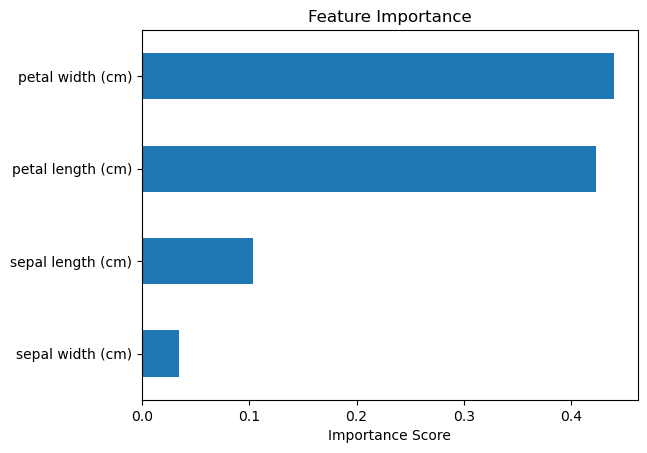

In [42]:
#Random Forest tells us which features are most important.
#Higher value represents more important feature

importances = rf.feature_importances_
features = X.columns

# Create DataFrame for visualization
feat_importance = pd.Series(importances, index=features)

# Plot
plt.figure()
feat_importance.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()


In [38]:
y_pred = rf.predict(X_test)

In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [40]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


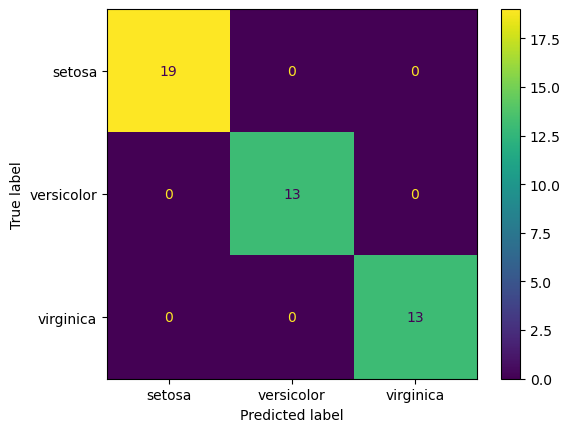

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()